### Set google drive

In [0]:
google_drive = False

### Import necessary modules

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

if google_drive:
    from google.colab import drive
    drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Define the load_data method for MNIST

In [0]:
def load_data_mnist():
    """
    Load the MNIST dataset. Reads the training and testing files and create matrices.
    :Expected return:
    train_data:the matrix with the training data
    test_data: the matrix with the data that will be used for testing
    y_train: the matrix consisting of one 
                        hot vectors on each row(ground truth for training)
    y_test: the matrix consisting of one
                        hot vectors on each row(ground truth for testing)
    """
    
    #load the train files
    df = None
    
    y_train = []

    for i in range( 10 ):
        if google_drive:
            tmp = pd.read_csv('/content/drive/My Drive/Μηχανική Μάθηση/projecta/mnistdata/train%d.txt' % i, header=None, sep=" ")
        else:
              tmp = pd.read_csv('mnistdata/train%d.txt' % i, header=None, sep=" ")
        #build labels - one hot vector
        hot_vector = [1 if j == i else 0 for j in range(0,10)]
        
        for j in range( tmp.shape[0] ):
            y_train.append( hot_vector )
        #concatenate dataframes by rows    
        if i == 0:
            df = tmp
        else:
            df = pd.concat( [df, tmp] )

    train_data = df.as_matrix()
    y_train = np.array( y_train )
    
    #load test files
    df = None
    
    y_test = []

    for i in range( 10 ):
        if google_drive:
            tmp = pd.read_csv( '/content/drive/My Drive/Μηχανική Μάθηση/projecta/mnistdata/test%d.txt' % i, header=None, sep=" ")
        else:
            tmp = pd.read_csv( 'mnistdata/test%d.txt' % i, header=None, sep=" " )
        
        #build labels - one hot vector
        hot_vector = [ 1 if j == i else 0 for j in range(0,10) ]

        for j in range( tmp.shape[0] ):
            y_test.append( hot_vector )
        #concatenate dataframes by rows    
        if i == 0:
            df = tmp
        else:
            df = pd.concat( [df, tmp] )

    test_data = df.as_matrix()
    y_test = np.array( y_test )
    
    return train_data, test_data, y_train, y_test

### Define the load_data method for CIFAR-10

In [0]:
"""Load from /home/USER/data/cifar10 or elsewhere; download if missing."""

import tarfile
import os
from urllib.request import urlretrieve
import numpy as np


def load_data_cifar_10(path=None):
    r"""Return (train_images, train_labels, test_images, test_labels).

    Args:
        path (str): Directory containing CIFAR-10. Default is
            /home/USER/data/cifar10 or C:\Users\USER\data\cifar10.
            Create if nonexistant. Download CIFAR-10 if missing.

    Returns:
        Tuple of (train_images, train_labels, test_images, test_labels), each
            a matrix. Rows are examples. Columns of images are pixel values,
            with the order (red -> blue -> green). Columns of labels are a
            onehot encoding of the correct class.
    """
    url = 'https://www.cs.toronto.edu/~kriz/'
    tar = 'cifar-10-binary.tar.gz'
    files = ['cifar-10-batches-bin/data_batch_1.bin',
             'cifar-10-batches-bin/data_batch_2.bin',
             'cifar-10-batches-bin/data_batch_3.bin',
             'cifar-10-batches-bin/data_batch_4.bin',
             'cifar-10-batches-bin/data_batch_5.bin',
             'cifar-10-batches-bin/test_batch.bin']

    if path is None:
        # Set path to /home/USER/data/mnist or C:\Users\USER\data\mnist
        path = os.path.join(os.path.expanduser('~'), 'data', 'cifar10')

    # Create path if it doesn't exist
    os.makedirs(path, exist_ok=True)

    # Download tarfile if missing
    if tar not in os.listdir(path):
        urlretrieve(''.join((url, tar)), os.path.join(path, tar))
        print("Downloaded %s to %s" % (tar, path))

    # Load data from tarfile
    with tarfile.open(os.path.join(path, tar)) as tar_object:
        # Each file contains 10,000 color images and 10,000 labels
        fsize = 10000 * (32 * 32 * 3) + 10000

        # There are 6 files (5 train and 1 test)
        buffr = np.zeros(fsize * 6, dtype='uint8')

        # Get members of tar corresponding to data files
        # -- The tar contains README's and other extraneous stuff
        members = [file for file in tar_object if file.name in files]

        # Sort those members by name
        # -- Ensures we load train data in the proper order
        # -- Ensures that test data is the last file in the list
        members.sort(key=lambda member: member.name)

        # Extract data from members
        for i, member in enumerate(members):
            # Get member as a file object
            f = tar_object.extractfile(member)
            # Read bytes from that file object into buffr
            buffr[i * fsize:(i + 1) * fsize] = np.frombuffer(f.read(), 'B')

    # Parse data from buffer
    # -- Examples are in chunks of 3,073 bytes
    # -- First byte of each chunk is the label
    # -- Next 32 * 32 * 3 = 3,072 bytes are its corresponding image

    # Labels are the first byte of every chunk
    labels = buffr[::3073]

    # Pixels are everything remaining after we delete the labels
    pixels = np.delete(buffr, np.arange(0, buffr.size, 3073))
    images = pixels.reshape(-1, 3072).astype('float32') / 255

    # Split into train and test
    train_images, test_images = images[:50000], images[50000:]
    train_labels, test_labels = labels[:50000], labels[50000:]

    def _onehot(integer_labels):
        """Return matrix whose rows are onehot encodings of integers."""
        n_rows = len(integer_labels)
        n_cols = integer_labels.max() + 1
        onehot = np.zeros((n_rows, n_cols), dtype='uint8')
        onehot[np.arange(n_rows), integer_labels] = 1
        return onehot

    return train_images, test_images, \
        _onehot(train_labels), _onehot(test_labels)

### Load the dataset

In [6]:
MNIST = False

print('Loading ', 'MNIST' if MNIST else 'CIFAR-10', '...', sep = '')

if MNIST:
    X_train, X_test, y_train, y_test = load_data_mnist()
else:
    X_train, X_test, y_train, y_test = load_data_cifar_10('cifar10/')
    
    # USE ONLY RED CHANNEL
    #X_train = X_train[:, :1024]
    #X_test = X_test[:, :1024]

Loading CIFAR-10...


In [7]:
X_train.shape

(50000, 3072)

In [8]:
X_test.shape

(10000, 3072)

### Random suffle data in order to have examples from different and random classes in each batch.

In [0]:
# train
train = [(x, y) for x, y in zip(X_train, y_train)]
np.random.shuffle(train)

X_train = [x for (x, y) in train]
y_train = [y for (x, y) in train]

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

# test
test = [(x, y) for x, y in zip(X_test, y_test)]
np.random.shuffle(test)

X_test = [x for (x, y) in test]
y_test = [y for (x, y) in test]

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

### Define category_name function

In [0]:
def category_name(c):
    if MNIST:
        return c
    else:
        categories = ['airplane', 'automobile', 'bird', 'cat', 'deer',\
                      'dog', 'frog', 'horse', 'ship', 'truck']
        return categories[c]

### View of the dataset

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


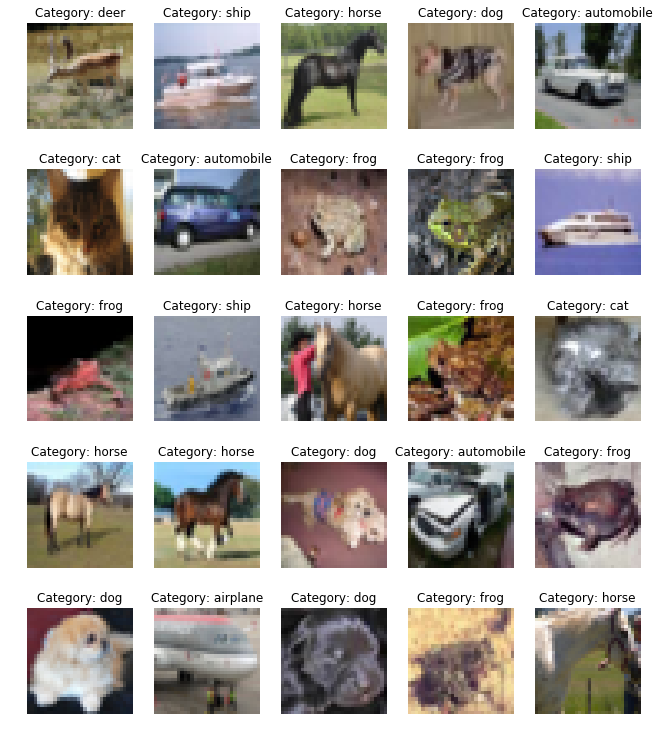

In [11]:
# plot 100 random images from the training set
n = 25
sqrt_n = int(n**0.5)
samples = np.random.randint(X_train.shape[0], size=n)

plt.figure(figsize=(11,13))

img = X_train

cnt = 0
for i in samples:
    cnt += 1
    plt.subplot(sqrt_n, sqrt_n, cnt)
    plt.subplot(sqrt_n, sqrt_n, cnt).axis('off')
    if MNIST:
        plt.imshow(img[i].reshape(28, 28), cmap='gray')
    else:
        R = img[i][0:1024].reshape(32, 32)
        G = img[i][1024:2048].reshape(32, 32)
        B = img[i][2048:3072].reshape(32, 32)
        img_rgb = np.dstack((R, G, B))
        plt.imshow(img_rgb, cmap='gray')
    plt.title("Category: " + str(category_name(np.argmax(y_train,1)[i])))

plt.show()

### Normalize and add a column of ones to the dataset

In [0]:
if MNIST:
    X_train = X_train.astype(float)/255
    X_test = X_test.astype(float)/255

X_train = np.hstack((np.ones((X_train.shape[0],1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0],1)), X_test))

### Define softmax

In [0]:
def softmax(x, ax=1):
    m = np.max(x, axis=ax, keepdims=True) #max per row
    p = np.exp(x - m)
    return (p / np.sum(p,axis=ax,keepdims=True))

### Define activation function

In [0]:
def h(a, version):
    if version == 0:
        return np.log(1 + np.exp(-np.abs(a))) + np.maximum(a, 0)
    elif version == 1:
        return (1 - np.exp(-2 * a))/(1 + np.exp(-2 * a))
    elif version == 2:
        return np.cos(a)
    else:
        print('Invalid version number.\nAccepted verson numbers: [0, 1, 2]')

In [0]:
def h_der(a, version):
    if version == 0:
        return 1 / (np.exp(-a) + 1)
    elif version == 1:
        return 1 - np.tanh(a) ** 2
    elif version == 2:
        return -np.sin(a)
    else:
        print('Invalid version number.\nAccepted verson numbers: [0, 1, 2]')

Ο πίνακας __I__ κρατάει όλα τα outputs του **input layer** για κάθε δεδομένο εκπαίδευσης από το batch.

![title](img/I_matrix.jpg)

Ο πίνακας __Z__ κρατάει όλα τα outputs του **hidden layer** για κάθε δεδομένο εκπαίδευσης από το batch και προκύπτει από το αποτέλεσμα που μας δίνει η συνάρτηση ενεργοποίησης, όταν της δώσουμε σαν όρισμα τον πίνακα **I**.

Ο πίνακας __O__ κρατάει όλα τα outputs του **output layer** για κάθε δεδομένο από το batch. Στη συνέχεια θα δοθεί σαν όρισμα στη συνάρτηση **softmax** για να πάρουμε τις τελικές προβλέψεις του μοντέλου.

![title](img/O_matrix.jpg)

### Define feed forward function

In [0]:
def feed_forward(W1, W2, batch, lamda, h_version):
    I = np.dot(batch, np.transpose(W1))
    
    Z = h(I, h_version)
    
    # We add one extra column with ones in Z matrix, that would be the output of the first neuron for each train example
    Z = np.hstack((np.ones((Z.shape[0], 1)), Z))

    O = np.dot(Z, np.transpose(W2))

    Y = softmax(O)
    
    return I, Z, O, Y

### Define cost function

In [0]:
'''def Ew(W1, W2, batch, T, lamda, h_version):
    
    I, Z, O, Y = feed_forward(W1, W2, batch, lamda, h_version)
    
    s = 0
    for n in range(batch.shape[0]):
        for k in range(10):
            s += T[n][k] * np.log(Y[n][k])
    return s - (lamda / 2) * (np.linalg.norm(W1, 'fro') ** 2 + np.linalg.norm(W2, 'fro') ** 2)'''

# Lab implementation
def Ew(W1, W2, batch, T, lamda, h_version):
    
    I, Z, O, Y = feed_forward(W1, W2, batch, lamda, h_version)
    
    max_error = np.max(O, axis=1)
    Ew = np.sum(T * O) - np.sum(max_error) - \
         np.sum(np.log(np.sum(np.exp(O - np.array([max_error, ] * O.shape[1]).T), 1))) - \
         (0.5 * lamda) * (np.sum(np.square(W1)) + np.sum(np.square(W2)))

    return Ew

### Define gradients for W1 and W2

In [0]:
def gradEw_W2(Z, T, Y, lamda, W1, W2):
    return np.dot(np.transpose(T - Y), Z) - lamda * W2

def gradEw_W1(batch, I, T, Y, lamda, W1, W2_no_bias, h_version):
    return np.dot(np.transpose(np.multiply(np.dot((T - Y), W2_no_bias), h_der(I, h_version))), batch) - lamda * W1

### Define neuron numbers

In [0]:
if MNIST:
    D = 784
else:
    D = 3072
M = 100
K = 10

### Initialize weights

In [20]:
use_saved_weights = False

if use_saved_weights:
    W1 = np.load('W1.npy')
    W2 = np.load('W2.npy')
else:
    # Xavier Glorot initialization
    W1 = np.random.rand(M, D + 1) * np.sqrt(6 / ((D + 1) + K))
    W2 = np.random.rand(K, M + 1) * np.sqrt(6 / ((D + 1) + K))

print(W1.shape)
print(W2.shape)

(100, 3073)
(10, 101)


### Gradient check

In [0]:
run_grad_check = False

#### Define gradient check for W1

In [0]:
def gradcheck_W1(W1init, W2init, X, t, lamda, h_version):
        
    W1_ = np.random.rand(*W1init.shape)
    W2_ = np.random.rand(*W2init.shape)
    epsilon = 1e-6
    
    _list = np.random.randint(X.shape[0], size=5)
    x_sample = np.array(X[_list, :])
    t_sample = np.array(t[_list, :])
    
    Ew_ = Ew(W1_, W2_, x_sample, t_sample, lamda, h_version)
    
    I_, Z_, O_, Y_ = feed_forward(W1_, W2_, x_sample, lamda, h_version)
    
    # We remove the bias
    W2_no_bias_ = np.copy(W2_[:, 1:])
    
    gradEw = gradEw_W1(x_sample, I_, t_sample, Y_, lamda, W1_, W2_no_bias_, h_version)
    
    print('gradEw1 shape:', gradEw.shape)
    
    numericalGrad = np.zeros(gradEw.shape)
    # Compute all numerical gradient estimates and store them in
    # the matrix numericalGrad
    for k in range(numericalGrad.shape[0]):
        for d in range(numericalGrad.shape[1]):
            
            #add epsilon to the w[k,d]
            w_tmp = np.copy(W1_)
            w_tmp[k, d] += epsilon
            e_plus = Ew(w_tmp, W2_, x_sample, t_sample, lamda, h_version)

            #subtract epsilon to the w[k,d]
            w_tmp = np.copy(W1_)
            w_tmp[k, d] -= epsilon
            e_minus = Ew(w_tmp, W2_, x_sample, t_sample, lamda, h_version)
            
            #approximate gradient ( E[ w[k,d] + theta ] - E[ w[k,d] - theta ] ) / 2*e
            numericalGrad[k, d] = (e_plus - e_minus) / (2 * epsilon)
    
    return (gradEw, numericalGrad)

#### Define gradient check for W2

In [0]:
def gradcheck_W2(W1init, W2init, X, t, lamda, h_version):
        
    W1_ = np.random.rand(*W1init.shape)
    W2_ = np.random.rand(*W2init.shape)
    epsilon = 1e-6
    
    _list = np.random.randint(X.shape[0], size=5)
    x_sample = np.array(X[_list, :])
    t_sample = np.array(t[_list, :])
    
    Ew_ = Ew(W1_, W2_, x_sample, t_sample, lamda, h_version)
    
    I_, Z_, O_, Y_ = feed_forward(W1_, W2_, x_sample, lamda, h_version)
    
    gradEw = gradEw_W2(Z_, t_sample, Y_, lamda, W1_, W2_)
    
    print('gradEw2 shape:', gradEw.shape)
    
    numericalGrad = np.zeros(gradEw.shape)
    # Compute all numerical gradient estimates and store them in
    # the matrix numericalGrad
    for k in range(numericalGrad.shape[0]):
        for d in range(numericalGrad.shape[1]):
            
            #add epsilon to the w[k,d]
            w_tmp = np.copy(W2_)
            w_tmp[k, d] += epsilon
            e_plus = Ew(W1_, w_tmp, x_sample, t_sample, lamda, h_version)

            #subtract epsilon to the w[k,d]
            w_tmp = np.copy(W2_)
            w_tmp[k, d] -= epsilon
            e_minus = Ew(W1_, w_tmp, x_sample, t_sample, lamda, h_version)
            
            #approximate gradient ( E[ w[k,d] + theta ] - E[ w[k,d] - theta ] ) / 2*e
            numericalGrad[k, d] = (e_plus - e_minus) / (2 * epsilon)
    
    return (gradEw, numericalGrad)

#### Run gradient check for both W1 and W2

In [0]:
if run_grad_check:
    h_version = 2
    lamda = 0.1
    
    gradEw1, numericalGrad1 = gradcheck_W1(W1, W2, X_train, y_train, lamda, h_version)
    # Absolute norm
    print('The difference estimate for gradient of W1 is:', np.max(np.abs(gradEw1 - numericalGrad1)))
    
    gradEw2, numericalGrad2 = gradcheck_W2(W1, W2, X_train, y_train, lamda, h_version)
    # Absolute norm
    print('The difference estimate for gradient of W2 is:', np.max(np.abs(gradEw2 - numericalGrad2)))


##### Gradient values

In [0]:
if run_grad_check:
    print(pd.DataFrame(gradEw1).head())

##### Numerical vaues

In [0]:
if run_grad_check:
    print(pd.DataFrame(numericalGrad1).head())

### Define train function

In [0]:
import time
# M = 100, lamda = 0.1, lr = 0.001, epochs = 100, h_version = 1 and random seed = 0 for 45% in CIFAR-10!
def train(M, lamda, lr, epochs, h_version, Nb = 100, update_lr = True, saved_weights = False, seed = False, verbose = False):
    
    if saved_weights:
        W1 = np.load('W1.npy')
        W2 = np.load('W2.npy')
    else:
        if seed:
            np.random.seed(0)
        # Xavier Glorot initialization
        W1 = np.random.rand(M, D + 1) * np.sqrt(6 / ((D + 1) + K))
        W2 = np.random.rand(K, M + 1) * np.sqrt(6 / ((D + 1) + K))

    # T: target
    T = y_train
    T_ = y_train

    #print('X_train:', X_train.shape)
    #print('T:', T.shape)

    # split X_train and convert the returned list to ndarray
    batches = np.asarray(np.split(X_train, X_train.shape[0] / Nb))

    # split (T)arget and convert the returned list to ndarray
    T_batches = np.asarray(np.split(T, T.shape[0] / Nb))

    #print('batches:', batches.shape)
    #print('T_batches:', T_batches.shape)

    # Compute the cost before training
    prev_cost = Ew(W1, W2, X_train, T, lamda, h_version)
    print('Cost before training =', prev_cost)
    
    delays = []
    x = 0
    y = lr
    for epoch in range(epochs):
        start_time = time.time()
        costs = []
        for i in range(batches.shape[0]):
            batch = batches[i]
            T = T_batches[i]
            
            I, Z, O, Y = feed_forward(W1, W2, batch, lamda, h_version)

            cost = Ew(W1, W2, batch, T, lamda, h_version)
            costs.append(cost)

            # Update W2
            dEw_dW2 = gradEw_W2(Z, T, Y, lamda, W1, W2)
            W2 += lr * dEw_dW2

            # We remove the bias
            W2_no_bias = np.copy(W2[:, 1:])

            # Update W1
            dEw_dW1 = gradEw_W1(batch, I, T, Y, lamda, W1, W2_no_bias, h_version)
            W1 += lr * dEw_dW1

        delays.append(time.time() - start_time)

        eta_seconds = np.mean(delays) * (epochs - epoch - 1)
        eta_mins = int(eta_seconds // 60)
        eta_seconds = int(eta_seconds % 60)
        
        cost = np.mean(costs)
        if verbose:
            if epoch % 10 == 0:
                print('epoch ', epoch, ':\tCost = ', cost, sep = '', end = '')
                print('\tETA = ', eta_mins, 'm ', eta_seconds, 's', sep = '')
        
        if update_lr:
            if cost < prev_cost:
                # decrease learning rate if the cost decreased
                lr *= 0.9
                print('\tCost decreased from previous epoch.')
                print('\tLearning rate decreased to:', lr)
            prev_cost = cost

    print('Train finished.')

    np.save('W1', W1)
    np.save('W2', W2)
    print('Weight matrices W1 and W2 saved for later use.')

    I, Z, O, Y = feed_forward(W1, W2, X_test, lamda, h_version)
    score = np.mean(np.argmax(Y, 1) == np.argmax(y_test, 1))
    return W1, W2, score

### Train model

In [35]:
W1, W2, score = train(M = 100, lamda = 0.1, lr = 0.001, epochs = 100, h_version = 1, verbose = True, update_lr = True, saved_weights = False)

Cost before training = -115480.25683923837
epoch 0:	Cost = -244.72334178205557	ETA = 11m 48s
epoch 10:	Cost = -238.72917375725362	ETA = 10m 22s
epoch 20:	Cost = -236.52223059906308	ETA = 9m 8s
epoch 30:	Cost = -235.704789492045	ETA = 8m 3s
epoch 40:	Cost = -230.69365209940315	ETA = 6m 54s
epoch 50:	Cost = -184.73687714078056	ETA = 5m 43s
epoch 60:	Cost = -175.990039584467	ETA = 4m 32s
	Cost decreased from previous epoch.
	Learning rate decreased to: 0.0009000000000000001
epoch 70:	Cost = -170.03399616569922	ETA = 3m 22s
epoch 80:	Cost = -167.14530930265096	ETA = 2m 12s
	Cost decreased from previous epoch.
	Learning rate decreased to: 0.0008100000000000001
epoch 90:	Cost = -162.7117130105999	ETA = 1m 2s
Train finished.
Weight matrices W1 and W2 saved for later use.


### Score on test data

In [37]:
I, Z, O, Y = feed_forward(W1, W2, X_test, 0.1, 1)
np.mean(np.argmax(Y, 1) == np.argmax(y_test, 1))

0.4505

### Visualize some examples that model failed to predict

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


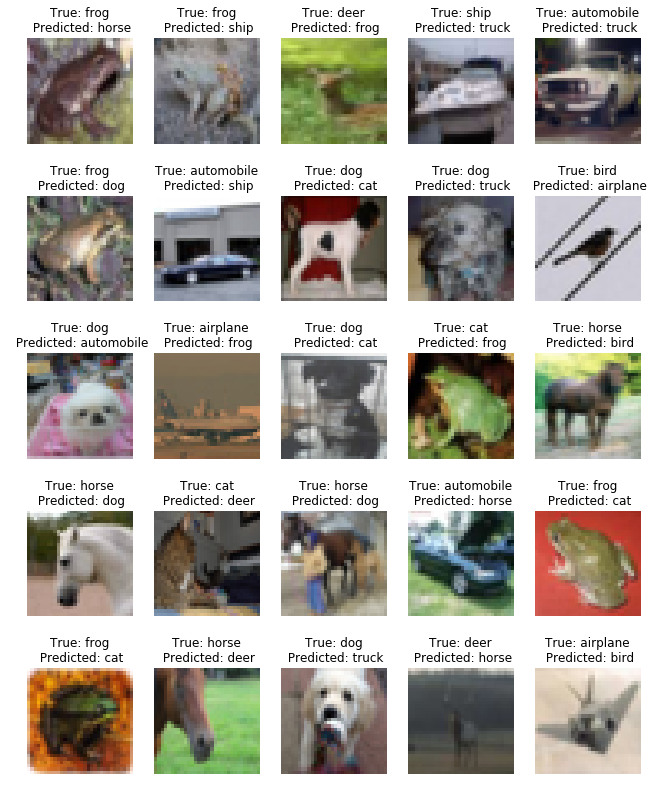

In [40]:
faults = np.where(np.not_equal(np.argmax(y_test, 1), np.argmax(Y, 1)))[0]
# plot n misclassified examples from the Test set
n = 25
samples = np.random.choice(faults, n)
sqrt_n = int(n ** 0.5)

plt.figure(figsize=(11,14))

img = X_test[:, 1:]

cnt = 0
for i in samples:
    cnt += 1
    plt.subplot(sqrt_n, sqrt_n, cnt)
    plt.subplot(sqrt_n, sqrt_n, cnt).axis('off')
    if MNIST:
        plt.imshow(img[i].reshape(28, 28), cmap='gray')
    else:
        R = img[i][0:1024].reshape(32, 32)
        G = img[i][1024:2048].reshape(32, 32)
        B = img[i][2048:3072].reshape(32, 32)
        img_rgb = np.dstack((R, G, B))
        plt.imshow(img_rgb, cmap='gray')
    plt.title("True: " + str(category_name(np.argmax(y_test,1)[i])) + "\n Predicted: " + str(category_name(np.argmax(Y, 1)[i])))
    
plt.show()